Import the GFP dataset:

In [1]:
import numpy as np
import pandas as pd
import csv
with open(r"C:\Users\roman\Desktop\DMS_data\DMS_data\GFP_AEQVI_Sarkisyan_2016.csv") as dms_GFP_datei:
    dms_GFP_datei_object = csv.reader(dms_GFP_datei, delimiter=',')
    print(dms_GFP_datei_object)
    for row in dms_GFP_datei_object:
        print(row)
GFP_dataset = pd.read_csv(r"C:\Users\roman\Desktop\DMS_data\DMS_data\GFP_AEQVI_Sarkisyan_2016.csv")
print(GFP_dataset)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



                                      mutant  \
0      K3R:V55A:Q94R:A110T:D117G:M153K:D216A   
1                       K3Q:V16A:I167T:L195Q   
2                K3Q:Y143C:N164D:S205P:A227T   
3                            K3Q:Y143N:V193A   
4                                        K3R   
...                                      ...   
51709                                  Y237N   
51710                                  Y237C   
51711                                  Y237D   
51712                                  Y237F   
51713                                  Y237H   

                                        mutated_sequence  DMS_score  \
0      MSRGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   1.301030   
1      MSQGEELFTGVVPILAELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.137350   
2      MSQGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   1.553913   
3      MSQGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.404237   
4      MSRGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...   3.738586 

Clean the Dataset and create a dataframe to work with:

      New_AS  Fitness_Score
4          R       3.738586
48         Q       3.750487
703        E       3.666278
924        M       3.698336
1160       T       3.629775
...      ...            ...
51709      N       3.809468
51710      C       3.760217
51711      D       3.754101
51712      F       3.673173
51713      H       3.735417

[1084 rows x 2 columns]


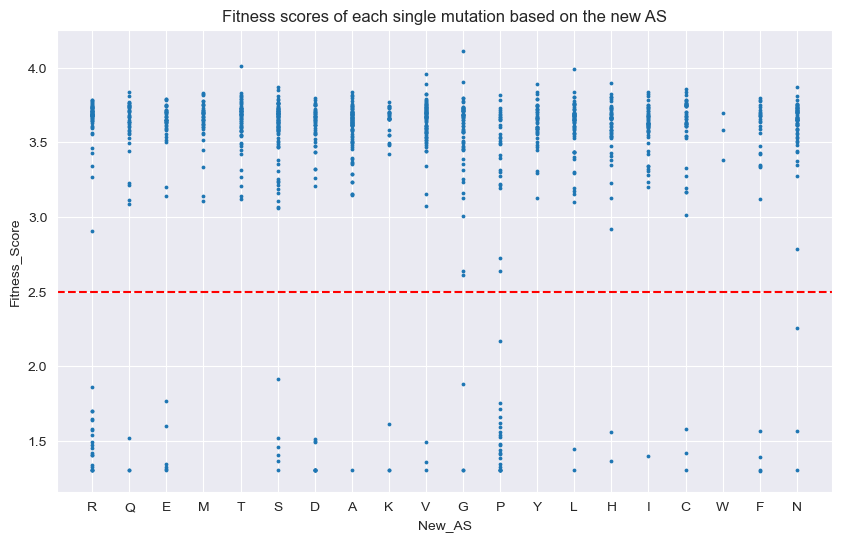

In [2]:
new_AA_of_mutation = []
for index, row in GFP_dataset.iterrows():
    last_character_of_mutation = row["mutant"][-1]
    new_AA_of_mutation.append(last_character_of_mutation)
new_AA_of_mutation_df = pd.DataFrame(new_AA_of_mutation, columns=["New_AS"])
#Last letter in each row

number_mutations_in_mutant = GFP_dataset["mutant"].str.count(":") + 1
number_mutations_singles = number_mutations_in_mutant == 1
#True are all the rows (=mutants) that only have 1 mutation

single_mutants_only_df = new_AA_of_mutation_df[number_mutations_singles]
#This filters all the rows with a "true" value from both dataframes and creates a new dataframe while preserving the filtering.

dms_score_df = []
for index, row in GFP_dataset.iterrows():
    dms_score = row["DMS_score"]
    dms_score_df.append(dms_score)
dms_score_df_alle = pd.DataFrame(dms_score_df, columns=["Fitness_Score"])
#Creates a dataframe with all the dms-scores and the according mutant-number (= experiment number).

dms_score_filtered = dms_score_df_alle[number_mutations_singles]
#Creates a dataframe will the dms-scores of only the single mutants

dms_score_filtered_newAS = single_mutants_only_df.join(dms_score_filtered)
print(dms_score_filtered_newAS)
#Kombiniert und erstellt ein neues Dataframe mit der neuen AS und dem jeweiligen DMS-score
import matplotlib.pyplot as plt
dot_size = 3
dms_score_filtered_newAS.plot(x="New_AS", y="Fitness_Score", kind="scatter", s=dot_size)
plt.gcf().set_size_inches(10, 6)
plt.title("Fitness scores of each single mutation based on the new AS")
threshold = 2.5
plt.axhline(threshold, color='red', linestyle='--', label='Threshold')
plt.show()
#Plot shows all the single mutants (new AA) with the corresponding dms-score. There is a clear cut off at 2.5 visible. Everything underneath is completely unfunctional

In [9]:
mutations_pos = []
for index, row in GFP_dataset.iterrows():
    mutations_pos_nummer = row["mutant"][1:-1]
    mutations_pos.append(mutations_pos_nummer)
mutations_pos_df = pd.DataFrame(mutations_pos, columns=["Position"])
#Entfernt erstmal nur das erste und letzte Zeichen
number_mutations = GFP_dataset["mutant"].str.count(":") + 1
number_mutations_singles = number_mutations == 1
#True sind alle Zeilen, die nur eine Mutation tragen

single_mutants_only_df_pos = mutations_pos_df[number_mutations_singles]
#Erstellt ein Dataframe, dass die Positionen innerhalb des Proteins aller Einzelmutanten zeigt

mutations_pos_df_mit_scores = single_mutants_only_df_pos.join(dms_score_filtered)
#Kombiniert und erstellt Dataframe mit der Position der Mutation und dem jeweiligen DMS-score (zeigt NICHT die neuen AS)
new_column = mutations_pos_df_mit_scores["Position"]
Roman_1 = dms_score_filtered_newAS.join(new_column)
Roman_1 = Roman_1[["Position", "New_AS", "Fitness_Score"]]

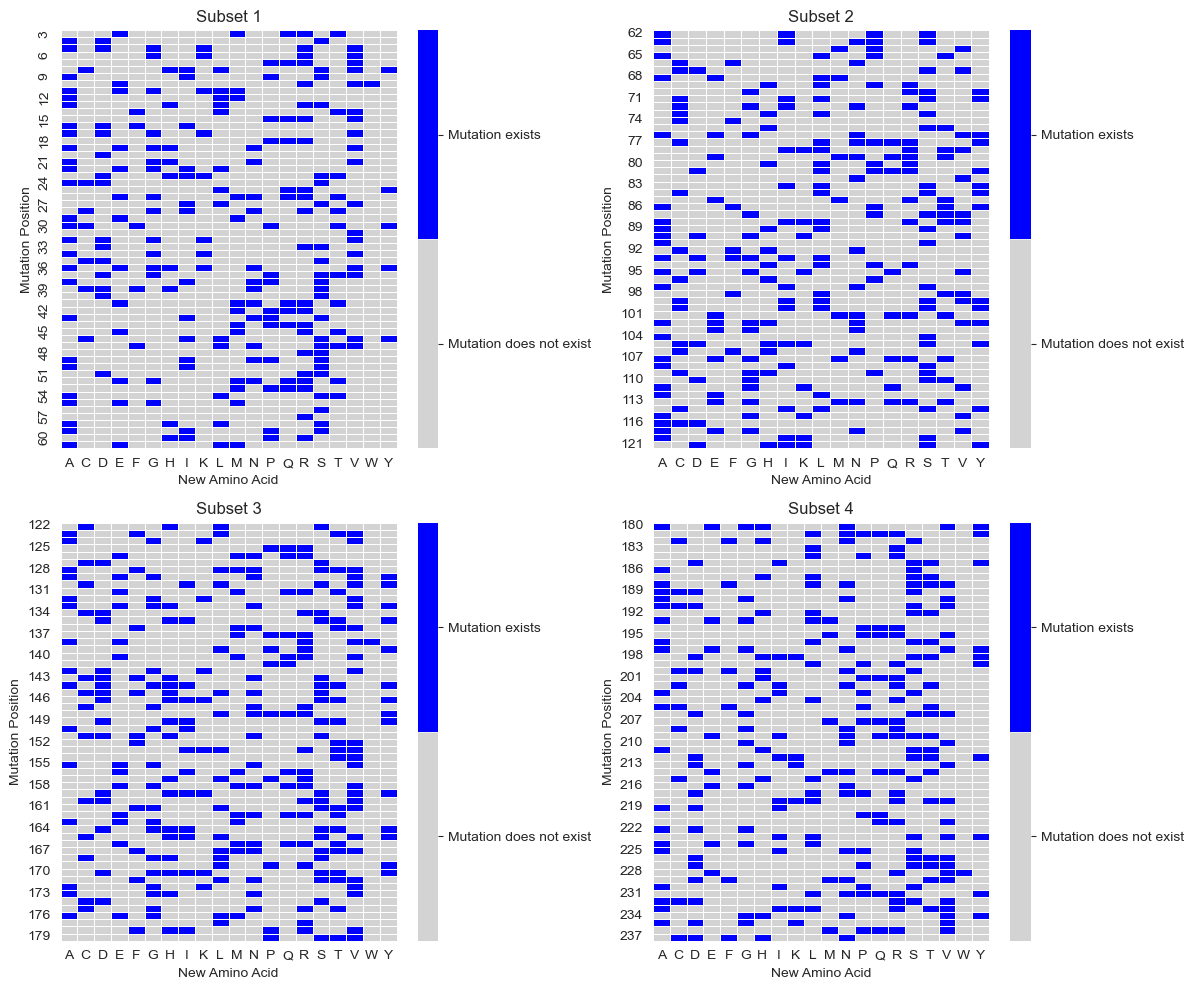

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

mutation_subsets = np.array_split(Roman_1['Position'].unique(), 4)  # Split into 4 subsets

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Create a custom colormap with the first and last colors from 'cividis'
custom_colors = ["lightgray", "blue"]
cmap = sns.color_palette(custom_colors)

# Create a shared colorbar with two ticks for the two possibilities
cbar_ticks = [0.25, 0.75]
cbar_ticklabels = ['Mutation does not exist', 'Mutation exists']


# Define a custom sorting function for the y-axis values
def position_sort(position):
    if position.isdigit():
        return int(position)
    else:
        return position

# Iterate over subsets and create heatmaps
for i, subset in enumerate(mutation_subsets):
    row = i // 2
    col = i % 2

    # Filter data based on subset
    subset_df = Roman_1[Roman_1['Position'].isin(subset)]

    # Sort the data by "Mutation Position" column in ascending order
    subset_df = subset_df.sort_values('Position')

    # Create cross-tabulation
    cross_tab = pd.crosstab(subset_df['Position'], subset_df['New_AS'])

    # Sort the columns alphabetically for better visualization
    cross_tab_sorted = cross_tab.reindex(sorted(cross_tab.columns), axis=1)

    # Sort the rows based on the custom y-axis sorting function
    cross_tab_sorted = cross_tab_sorted.iloc[sorted(range(len(cross_tab_sorted)), key=lambda x: position_sort(cross_tab_sorted.index[x]))]

    # Create heatmap in the corresponding subplot
    ax = sns.heatmap(cross_tab_sorted, cmap=cmap, annot=False, fmt='d', ax=axes[row, col],
                     cbar_kws={'ticks': cbar_ticks, 'drawedges': True}, linewidths=0.5)

    axes[row, col].set_xlabel('New Amino Acid')
    axes[row, col].set_ylabel('Mutation Position')
    axes[row, col].set_title(f'Subset {i+1}')

    # Set colorbar tick labels
    cbar = ax.collections[0].colorbar
    cbar.set_ticklabels(cbar_ticklabels)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

#A heatmap to see which single mutations are available in the dataset and which are not.
#Only focuses on the new amino acid that occurs, not the old one before the mutation.

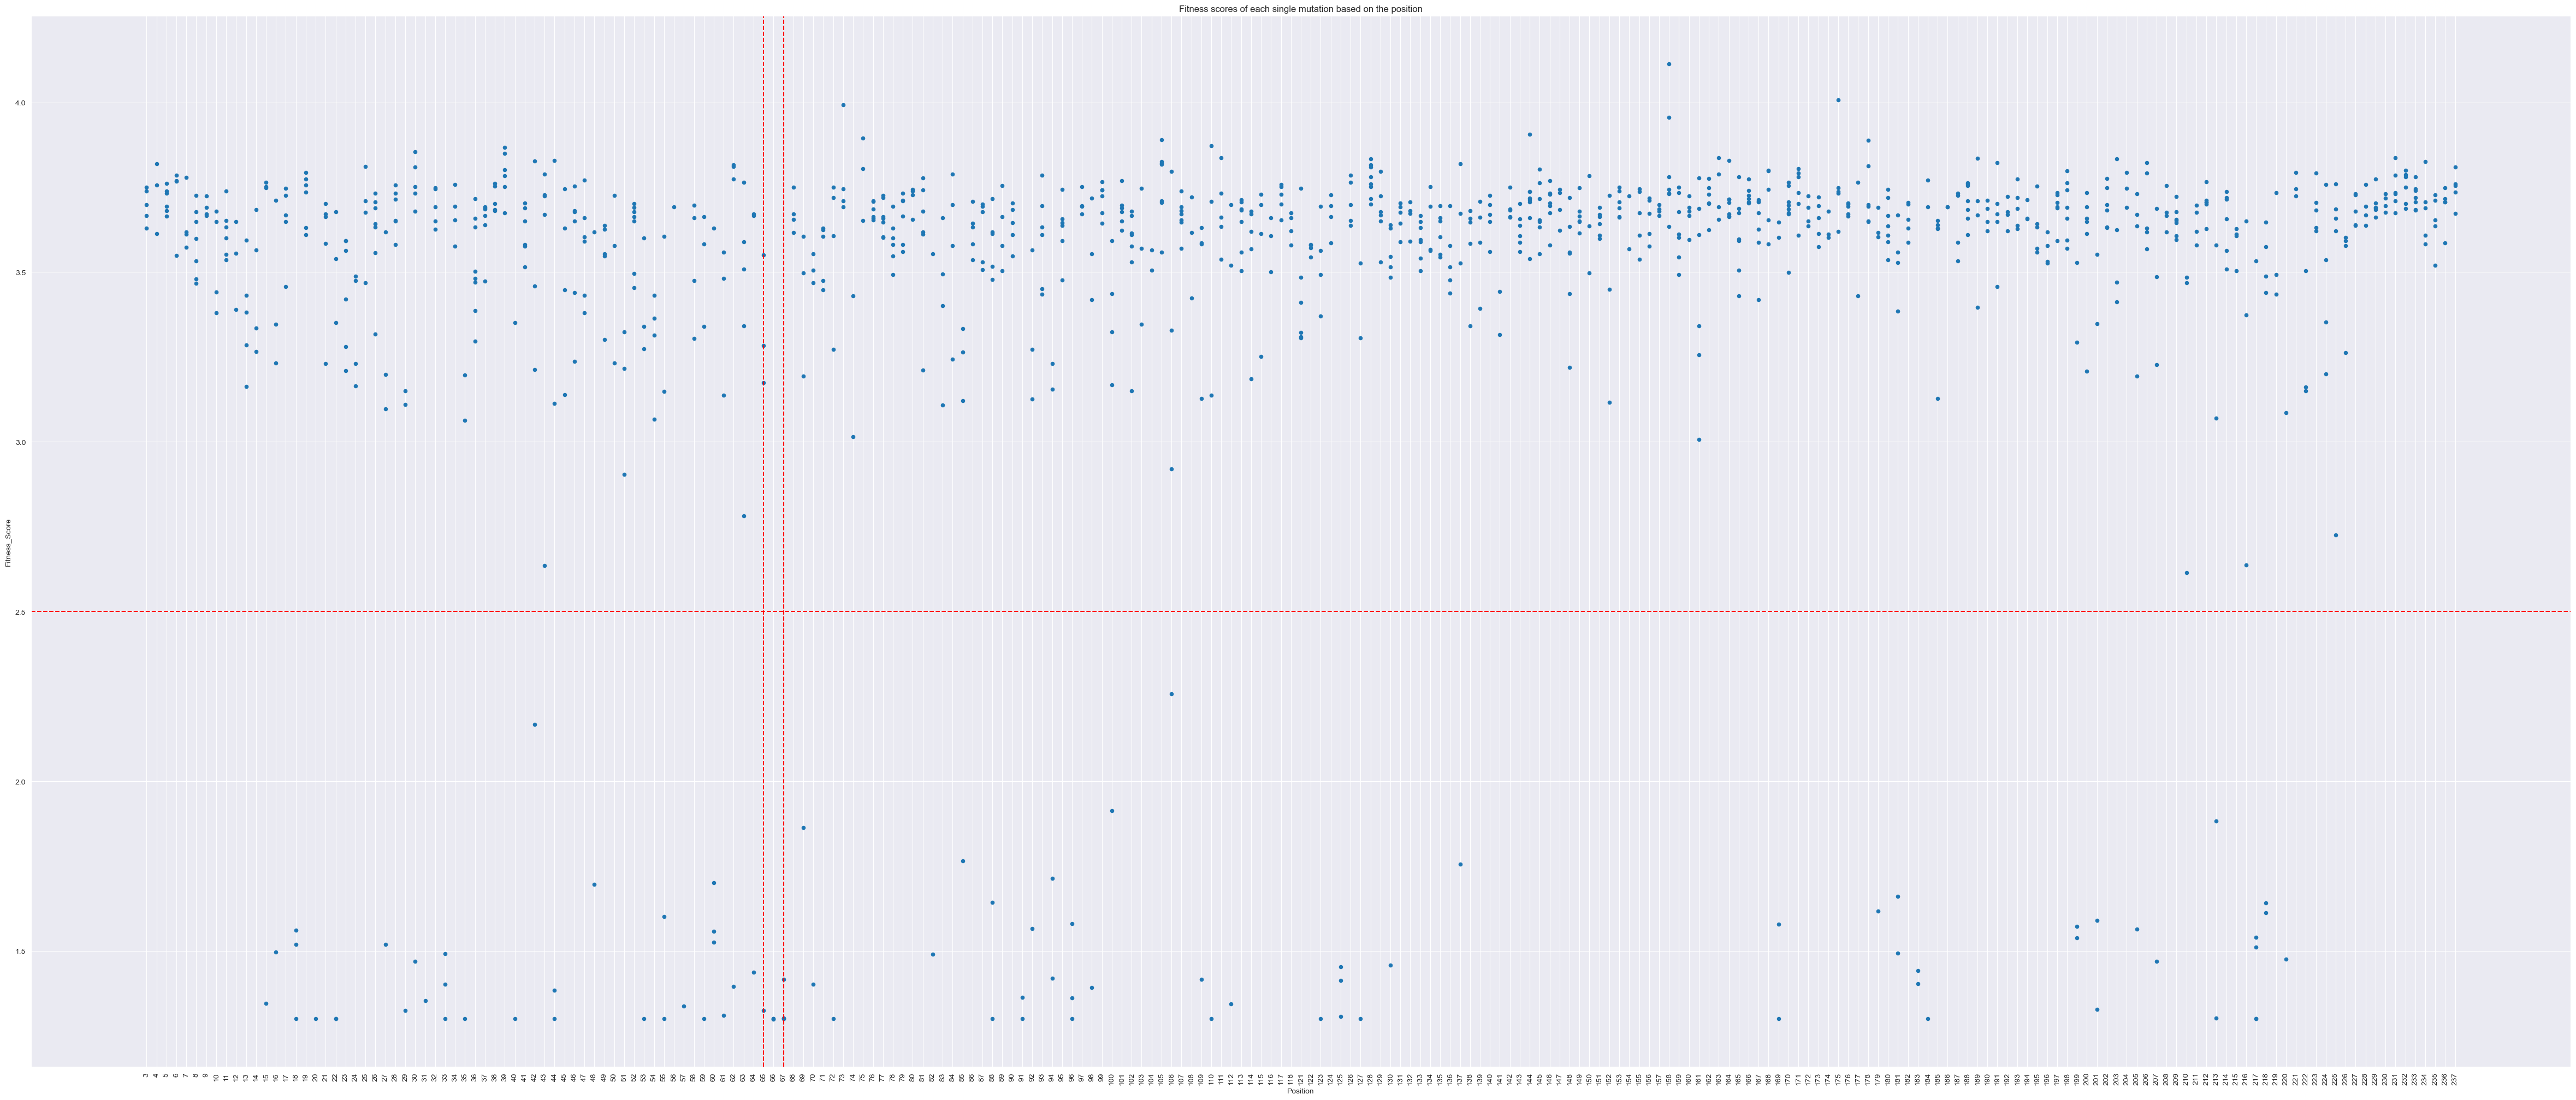

In [15]:
import matplotlib.pyplot as plt
mutations_pos_df_mit_scores.plot(x="Position", y="Fitness_Score", kind="scatter")
plt.title("Fitness scores of each single mutation based on the position")
#plt.figure(figsize=(100, 6))
#Macht das Diagramm auf Größe "Breite, Höhe" größer

#plt.xticks(rotation=45)  #
##Rotate the x-axis labels by 45 degrees

plt.xticks(rotation='vertical')
# Rotate the x-axis labels vertically
plt.gcf().set_size_inches(60, 25)
#Increase the width to 10 inches and height to 6 inches

a_threshold = 2.5
plt.axhline(threshold, color='red', linestyle='--', label='Threshold')
a_threshold_65 = 62
plt.axvline(a_threshold_65, color='red', linestyle='--', label='Threshold_65')
a_threshold_67 = 64
plt.axvline(a_threshold_67, color='red', linestyle='--', label='Threshold_67')
#Positionen 65-67 gehören zum Chromophor
#Interessant ist hier, dass es Mutationen gibt, die trotz Mutation im Chromophor an Position 65 einen guten score haben. Position 66 und 67 jedoch nicht
plt.show()

#Plot mit single Mutanten basierend auf Position der Mutation.!!!!!!!!!!!!!!!!!!
#Plot shows all the single mutations that occured at a specific position (x-axis) against the dms-score (y-axis)